In [95]:
import os
# print(os.getcwd())
os.chdir('/home/jovyan/yelp_dataset')
# print(os.getcwd())

In [2]:
print(os.listdir())

['Dataset_User_Agreement.pdf', 'yelp_academic_dataset_business.json', 'yelp_academic_dataset_checkin.json', 'yelp_academic_dataset_review.json', 'yelp_academic_dataset_tip.json', 'yelp_academic_dataset_user.json']


In [3]:
import json
import pandas as pd
import numpy as np

# Read all tables
# file_name: name of .json file
# max_iter: how many rows to read
def read_yelp_table(file_name, max_iter=None):
    data_file = open(file_name, encoding='utf-8')
    data = []
    for i, line in enumerate(data_file):
        data.append(json.loads(line))
        if max_iter is not None:
            if i > max_iter:
                break
    read_df = pd.DataFrame(data)
    data_file.close()
    return read_df

## Read Data

In [4]:
business_df = read_yelp_table('yelp_academic_dataset_business.json')
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
checkin_df = read_yelp_table('yelp_academic_dataset_checkin.json')
checkin_df.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [6]:
#review_df = read_yelp_table("yelp_academic_dataset_review.json", max_iter=1000000)
review_df = read_yelp_table("yelp_academic_dataset_review.json")
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [7]:
tip_df = read_yelp_table("yelp_academic_dataset_tip.json")
tip_df.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [8]:
# user_df = read_yelp_table("yelp_academic_dataset_user.json", max_iter=10000)
user_df = read_yelp_table("yelp_academic_dataset_user.json")
user_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


##### Data shape and check on the uniqueness of indices

In [9]:
print('Shape:\nBusiness: {},\nUsers: {},\nTips: {},\nReviews: {},\nCheck-ins: {}'.format(business_df.shape, user_df.shape, tip_df.shape, review_df.shape,
                                                                               checkin_df.shape))

Shape:
Business: (150346, 14),
Users: (1987897, 22),
Tips: (908915, 5),
Reviews: (6990280, 9),
Check-ins: (131930, 2)


In [10]:
print('Unique indices:\nBusiness: {},\nUsers: {},\nReviews: {},\nCheck-ins: {}\n'.format(business_df.business_id.nunique(), user_df.user_id.nunique(),
                                                          review_df.review_id.nunique(), checkin_df.business_id.nunique()))

Unique indices:
Business: 150346,
Users: 1987897,
Reviews: 6990280,
Check-ins: 131930



## Exploratory analysis: business_df

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [12]:
# Print info
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [13]:
# Check number of unique values for the columns
business_df.drop(['attributes','hours'],axis=1).nunique()

business_id     150346
name            114117
address         122844
city              1416
state               27
postal_code       3362
latitude        135593
longitude       131918
stars                9
review_count      1158
is_open              2
categories       83160
dtype: int64

Missing values in attributes, categories and hours

<AxesSubplot:title={'center':'Distribution of star ratings among all business'}, xlabel='stars', ylabel='count'>

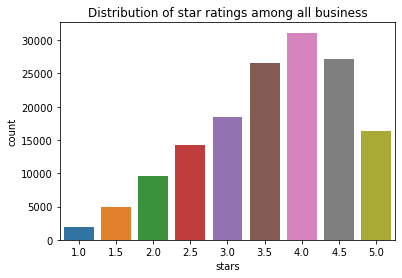

In [14]:
# Plot star rating distribution
plt.title("Distribution of star ratings among all business")
sns.countplot(x=business_df.stars)

<AxesSubplot:title={'center':'Distribution of states where the business exists'}, xlabel='state', ylabel='count'>

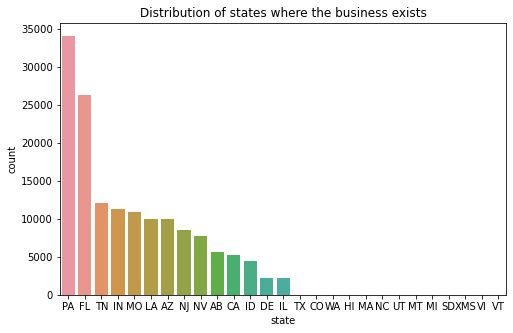

In [15]:
# Plot distribution among countries
plt.figure(figsize=(8,5))
plt.title("Distribution of states where the business exists")
sns.countplot(x=business_df.state,
             order = business_df["state"].value_counts().index)

In [16]:
# Number of unique states
business_df.state.nunique()

27

In [17]:
# Percent of business_ids opened in each state from the whole data set
business_df.state.value_counts(normalize=True)

PA     0.226404
FL     0.175129
TN     0.080188
IN     0.074807
MO     0.072586
LA     0.066008
AZ     0.065928
NJ     0.056776
NV     0.051315
AB     0.037068
CA     0.034607
ID     0.029711
DE     0.015065
IL     0.014267
TX     0.000027
CO     0.000020
WA     0.000013
HI     0.000013
MA     0.000013
NC     0.000007
UT     0.000007
MT     0.000007
MI     0.000007
SD     0.000007
XMS    0.000007
VI     0.000007
VT     0.000007
Name: state, dtype: float64

In [18]:
# Description of business categories
business_df.categories.value_counts()

Beauty & Spas, Nail Salons                                                                                       1012
Restaurants, Pizza                                                                                                935
Nail Salons, Beauty & Spas                                                                                        934
Pizza, Restaurants                                                                                                823
Restaurants, Mexican                                                                                              728
                                                                                                                 ... 
Dermatologists, Health & Medical, Cosmetic Surgeons, Doctors, Acne Treatment, Skin Care, Beauty & Spas              1
Home Services, Home & Garden, Nurseries & Gardening, Hardware Stores, Shopping, Building Supplies, Appliances       1
Food Trucks, Smokehouse, Restaurants, Food, Barbeque, So

In [19]:
# Extract categories
categories_df = business_df['categories'].str.get_dummies(sep=', ')
categories_names = categories_df.columns.tolist()

In [20]:
categories_df.shape

(150346, 1311)

In [21]:
# Detect missing values in categories
categories_df['is_category_None'] = business_df['categories'].isnull()

In [22]:
# Percent of business_ids having each category
categories_perc = (categories_df.sum() / categories_df.shape[0])
categories_perc.sort_values(ascending=False).head(20)

Restaurants                  0.347651
Food                         0.184780
Shopping                     0.162259
Home Services                0.095486
Beauty & Spas                0.095061
Nightlife                    0.081685
Health & Medical             0.079084
Local Services               0.074482
Bars                         0.073597
Automotive                   0.071655
Event Planning & Services    0.065815
Sandwiches                   0.055645
American (Traditional)       0.054135
Active Life                  0.051129
Pizza                        0.047178
Coffee & Tea                 0.044584
Fast Food                    0.043047
Breakfast & Brunch           0.041498
American (New)               0.040553
Hotels & Travel              0.038957
dtype: float64

In [23]:
# Description of business attributes
business_df.attributes[0:10]

0                        {'ByAppointmentOnly': 'True'}
1               {'BusinessAcceptsCreditCards': 'True'}
2    {'BikeParking': 'True', 'BusinessAcceptsCredit...
3    {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4    {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
5    {'BusinessParking': 'None', 'BusinessAcceptsCr...
6    {'BusinessAcceptsCreditCards': 'True', 'Restau...
7                                                 None
8    {'Caters': 'True', 'Alcohol': 'u'full_bar'', '...
9    {'RestaurantsAttire': ''casual'', 'Restaurants...
Name: attributes, dtype: object

In [24]:
# Extract attributes
attributes_df = business_df.attributes.str.join('|').str.get_dummies()
attributes_names = attributes_df.columns.tolist()

In [25]:
attributes_df.shape

(150346, 39)

In [26]:
attributes_df['is_attribute_None'] = business_df['attributes'].isnull()

In [27]:
# Percent of business_ids having each category
attributes_perc = attributes_df.sum() / attributes_df.shape[0]
attributes_perc.sort_values(ascending=False)

BusinessAcceptsCreditCards    0.796596
BusinessParking               0.605836
RestaurantsPriceRange2        0.567451
BikeParking                   0.483139
RestaurantsTakeOut            0.398128
WiFi                          0.378553
RestaurantsDelivery           0.374350
GoodForKids                   0.355014
OutdoorSeating                0.324598
RestaurantsReservations       0.300952
HasTV                         0.299868
Ambience                      0.294514
RestaurantsGoodForGroups      0.293789
Alcohol                       0.287264
ByAppointmentOnly             0.281610
Caters                        0.266898
RestaurantsAttire             0.261098
NoiseLevel                    0.252704
GoodForMeal                   0.193467
WheelchairAccessible          0.192576
RestaurantsTableService       0.132907
DogsAllowed                   0.121613
BusinessAcceptsBitcoin        0.115933
HappyHour                     0.100907
is_attribute_None             0.091416
DriveThru                

## Problem 1: Binary classifier for business_df

<AxesSubplot:title={'center':'Distribution of binary star ratings among all business'}, xlabel='stars_bin', ylabel='count'>

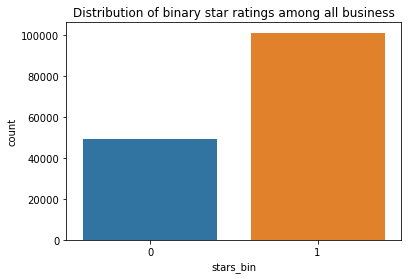

In [28]:
# Create a binary variable. Stars >= 3.5 - good (1), otherwise - neutral or bad (0). 
business_bin_df = business_df.copy()
business_bin_df['stars_bin'] = business_df.stars.apply(lambda x: 1 if x >= 3.5 else 0)
plt.title('Distribution of binary star ratings among all business')
sns.countplot(x=business_bin_df.stars_bin)

Alternatively, we can start from the star rating 4 to define a good business. Then, we get more balanced data, but here it is more the question of definition of the threshold based on human expectations and can be a research question for the future work. Also, in this case the class labels itself are separated in a more imbalanced way (5 bad classes vs. 3 good classes).

<AxesSubplot:xlabel='stars', ylabel='count'>

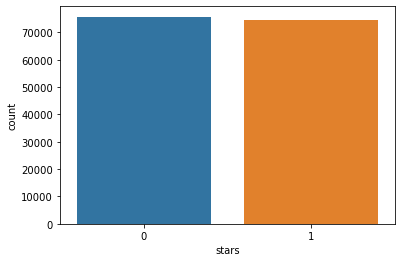

In [29]:
# P.S.: To get a balanced variant, we should put 3.5 in the neutral or bad value (0)
sns.countplot(x=business_df.stars.apply(lambda x: 1 if x > 3.5 else 0))

### Feature Engineering

##### Add dummy categories and attributes to business_df

In [30]:
# Select categories which occur more often than or equal to 0.01 frequency
cat_col_choice = categories_perc[categories_perc >= 0.01].keys().tolist()
cat_col_choice.append('is_category_None')
categories_bin_df = categories_df[cat_col_choice]

In [31]:
categories_bin_df.shape

(150346, 90)

In [32]:
business_bin_df = business_bin_df.join(categories_bin_df, how='inner')

In [33]:
# Drop unnecessary categories
business_bin_df.drop(['categories', 'review_count', 'is_open', 'name', 'address', 'city', 'postal_code', 'latitude', 'longitude', 'hours', 'stars'], axis=1,
                    inplace=True)

In [34]:
business_bin_df.head(2)

,business_id,state,attributes,stars_bin,Accessories,Active Life,American (New),American (Traditional),Apartments,Arts & Entertainment,...,Sporting Goods,Sports Bars,Steakhouses,Sushi Bars,Tires,Venues & Event Spaces,Waxing,Wine & Spirits,Women's Clothing,is_category_None
0,Pns2l4eNsfO8kk83dixA6A,CA,{'ByAppointmentOnly': 'True'},1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1,mpf3x-BjTdTEA3yCZrAYPw,MO,{'BusinessAcceptsCreditCards': 'True'},0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [35]:
business_bin_df.loc[1917,:]

business_id              SMYXOLPyM95JvZ-oqnsWUA
state                                        NJ
attributes                                 None
stars_bin                                     0
Accessories                                   0
                                  ...          
Venues & Event Spaces                         0
Waxing                                        0
Wine & Spirits                                0
Women's Clothing                              0
is_category_None                           True
Name: 1917, Length: 94, dtype: object

In [36]:
# Select attributes which occur more often than or equal to 0.01 frequency
attributes_bin_df = attributes_df[attributes_perc[attributes_perc >= 0.01].keys()]

In [37]:
attributes_bin_df.shape

(150346, 34)

In [38]:
# Join data sets and drop 'attributes'
business_bin_df = business_bin_df.join(attributes_bin_df, how='inner')
business_bin_df.drop(['attributes'], axis=1, inplace=True)

In [39]:
business_bin_df.head(2)

,business_id,state,stars_bin,Accessories,Active Life,American (New),American (Traditional),Apartments,Arts & Entertainment,Asian Fusion,...,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,is_attribute_None
0,Pns2l4eNsfO8kk83dixA6A,CA,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1,mpf3x-BjTdTEA3yCZrAYPw,MO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


##### Check NAs in the data set

In [40]:
business_bin_df.isnull().sum().sum() # no NAs in the data set

0

<AxesSubplot:xlabel='state', ylabel='count'>

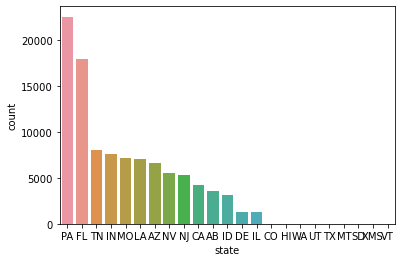

In [41]:
# Compare how the sate distribution changes for good and bad star rating
sns.countplot(x=business_bin_df.loc[business_bin_df['stars_bin'] == 1, "state"],
             order = business_bin_df.loc[business_bin_df['stars_bin'] == 1, "state"].value_counts().index)

<AxesSubplot:xlabel='state', ylabel='count'>

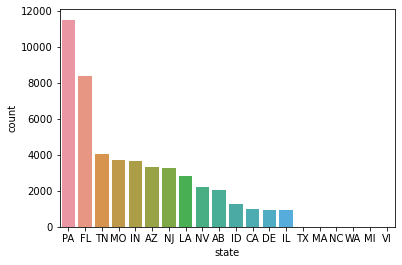

In [42]:
sns.countplot(x=business_bin_df.loc[business_bin_df['stars_bin'] == 0, "state"],
             order = business_bin_df.loc[business_bin_df['stars_bin'] == 0, "state"].value_counts().index)

### Construction of Classifier 

In [43]:
# Import sklearn and xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, RocCurveDisplay, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from xgboost import XGBClassifier

# For parallelization
import multiprocessing

# Detect number of cores for parallelization
n_cores = multiprocessing.cpu_count() - 1

C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


##### Create test and train data

In [44]:
y = business_bin_df.stars_bin
X = business_bin_df.drop(['stars_bin'], axis=1)

# Train/test split (stratified because of imbalanced data set)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1,
                                                   stratify=y)

In [45]:
X_train.head()

,business_id,state,Accessories,Active Life,American (New),American (Traditional),Apartments,Arts & Entertainment,Asian Fusion,Auto Parts & Supplies,...,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,is_attribute_None
126672,Zdl6M1oDa_B49MGrlqbBtQ,CA,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,False
110673,sOm2Pr1KtuHgW1sY4plF4Q,ID,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,False
29299,M3LZKA-tVFRJyPeKA3_2OA,CA,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,1,0,False
58149,xj1chhMopuxq2ctQdZi2SA,PA,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,False
33534,FEXhWNCMkv22qG04E83Qjg,LA,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,1,False


In [46]:
print('Split results:')
print('Train:\n{}'.format(y_train.value_counts(normalize=True)))
print('Test:\n{}'.format(y_test.value_counts(normalize=True)))

Split results:
Train:
1    0.672661
0    0.327339
Name: stars_bin, dtype: float64
Test:
1    0.672664
0    0.327336
Name: stars_bin, dtype: float64


##### Transform categorical columns with one-hot encoding

In [47]:
# One-hot encoder (will used for states)
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# One-hot encoding for states
oh_cols_train = pd.DataFrame(oh_encoder.fit_transform(X_train[['state']]), columns=oh_encoder.get_feature_names_out())
oh_cols_test = pd.DataFrame(oh_encoder.transform(X_test[['state']]), columns=oh_encoder.get_feature_names_out())

# Function for merging categorical columns with the data set
def data_oh_merge(data_set, oh_cols):
    # Get index
    oh_cols.index = data_set.index
    # Remove categorical columns
    data_set.drop(['state'], axis=1, inplace=True)
    # Merge encoding with the data set 
    data_set_oh = data_set.join(oh_cols, how='inner')
    # Drop business_id
    data_set_oh.drop(['business_id'], axis=1, inplace=True)
    return data_set_oh

X_train_final = data_oh_merge(data_set=X_train, oh_cols=oh_cols_train)
X_test_final = data_oh_merge(data_set=X_test, oh_cols=oh_cols_test)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(X_train_final.shape)
print(X_test_final.shape)

(120276, 125)
(30070, 125)
(120276, 150)
(30070, 150)


In [49]:
X_train_final.head(2)

,Accessories,Active Life,American (New),American (Traditional),Apartments,Arts & Entertainment,Asian Fusion,Auto Parts & Supplies,Auto Repair,Automotive,...,state_NV,state_PA,state_SD,state_TN,state_TX,state_UT,state_VI,state_VT,state_WA,state_XMS
126672,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110673,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Logistic regression

In [50]:
# Stratified cross-validation
stratifiedkf = StratifiedKFold(n_splits=3, random_state=1,shuffle=True)

#  Cs grid
# Cs_grid = [100, 10, 1, .1, .01, .001]
Cs_grid = [0.25, 0.5, 1, 1.5, 2]

# Logistic classifier with L1 regularization
lr_model = LogisticRegressionCV(Cs=Cs_grid,random_state=1, penalty='l1', solver='liblinear', cv=stratifiedkf, scoring='roc_auc')
lr_model.fit(X=X_train_final, y=y_train)

LogisticRegressionCV(Cs=[0.25, 0.5, 1, 1.5, 2],
                     cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
                     penalty='l1', random_state=1, scoring='roc_auc',
                     solver='liblinear')

In [51]:
# Prediction
y_pred = lr_model.predict(X_test_final)
print('\nAccuracy: {:.4f},\nPrecision: {:.4f},\nRecall: {:.4f},\nF1 score: {:.4f}'.format(
    accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
print('AUC: {:.4f}'.format(auc(fpr, tpr)))


Accuracy: 0.7238,
Precision: 0.7374,
Recall: 0.9154,
F1 score: 0.8168
AUC: 0.6227


In [52]:
# Best hyperparameter
lr_model.C_

array([1.])

ROC curve


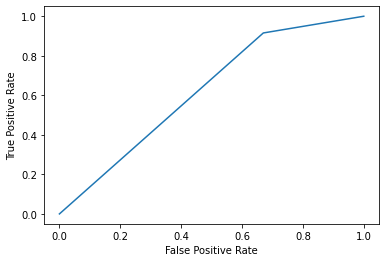

In [53]:
# ROC curve
print('ROC curve')
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [54]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 3249,  6594],
       [ 1711, 18516]], dtype=int64)

Top 15 features


<AxesSubplot:>

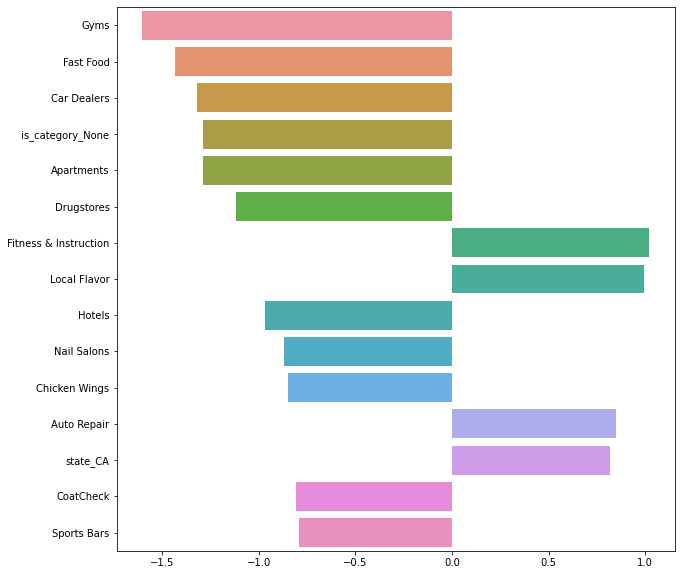

In [55]:
# Features
sorted_index_lr = np.abs(lr_model.coef_[0]).argsort()[::-1][:15]
sorted_index_pos_lr = lr_model.coef_[0].argsort()[::-1][:20]
sorted_index_neg_lr = lr_model.coef_[0].argsort()[:20]
print('Top 15 features')
plt.figure(figsize=(10, 10))
sns.barplot(y=X_train_final.columns[sorted_index_lr], x=lr_model.coef_[0][sorted_index_lr], orient='h')

Top 15 features with positive coefficients


<AxesSubplot:>

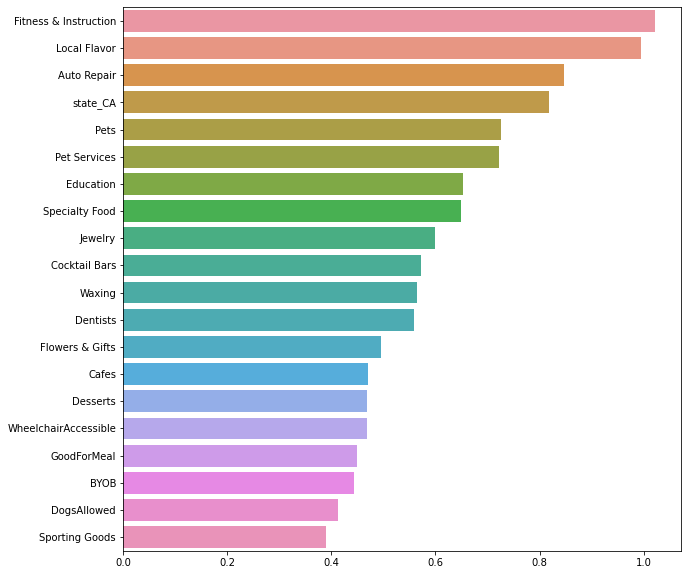

In [56]:
plt.figure(figsize=(10, 10))
print('Top 15 features with positive coefficients')
sns.barplot(y=X_train_final.columns[sorted_index_pos_lr], x=lr_model.coef_[0][sorted_index_pos_lr], orient='h')

Top 15 features with negative coefficients


<AxesSubplot:>

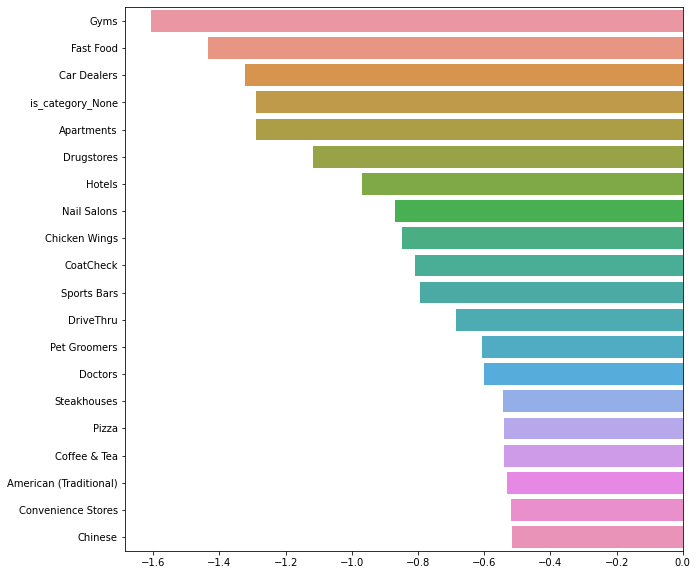

In [57]:
plt.figure(figsize=(10, 10))
print('Top 15 features with negative coefficients')
sns.barplot(y=X_train_final.columns[sorted_index_neg_lr], x=lr_model.coef_[0][sorted_index_neg_lr], orient='h')

##### XGBoost

In [58]:
# KFold for XGBoost
stratifiedkf_xgb = StratifiedKFold(n_splits=3, random_state=1,shuffle=True)

# Parameters' grid
param_grid = [{'eta': np.array([0.4, 0.5, 0.6]),
               'min_child_weight': np.arange(1, 6, 1),}]
# 'eta': np.array([0.2, 0.25, 0.3, 0.35, 0.4])
# 'eta': np.array([0.01, 0.05, 0.1, 0.15, 0.2])

# XGB Classifier
xgb_model = XGBClassifier(n_estimators=100, n_jobs=n_cores, use_label_encoder=False, random_state=1)

# Grid for CV
gridsearchcv = GridSearchCV(xgb_model, param_grid, scoring='roc_auc', cv=stratifiedkf_xgb.split(X_train_final, y_train), verbose=3) 
gridsearchcv.fit(X_train_final, y_train, eval_metric='auc') 

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.4, min_child_weight=1;, score=0.763 total time=   7.3s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.4, min_child_weight=1;, score=0.767 total time=   7.2s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.4, min_child_weight=1;, score=0.764 total time=   7.4s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.4, min_child_weight=2;, score=0.765 total time=   7.6s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.4, min_child_weight=2;, score=0.768 total time=   7.3s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.4, min_child_weight=2;, score=0.764 total time=   7.1s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.4, min_child_weight=3;, score=0.764 total time=   7.0s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.4, min_child_weight=3;, score=0.769 total time=   7.1s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.4, min_child_weight=3;, score=0.764 total time=   7.1s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.4, min_child_weight=4;, score=0.766 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.4, min_child_weight=4;, score=0.768 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.4, min_child_weight=4;, score=0.765 total time=   6.8s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.4, min_child_weight=5;, score=0.765 total time=   7.0s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.4, min_child_weight=5;, score=0.769 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.4, min_child_weight=5;, score=0.766 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.5, min_child_weight=1;, score=0.763 total time=   7.0s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.5, min_child_weight=1;, score=0.766 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.5, min_child_weight=1;, score=0.762 total time=   7.1s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.5, min_child_weight=2;, score=0.764 total time=   7.1s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.5, min_child_weight=2;, score=0.766 total time=   7.1s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.5, min_child_weight=2;, score=0.763 total time=   7.5s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.5, min_child_weight=3;, score=0.763 total time=   7.1s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.5, min_child_weight=3;, score=0.767 total time=   7.1s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.5, min_child_weight=3;, score=0.762 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.5, min_child_weight=4;, score=0.763 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.5, min_child_weight=4;, score=0.767 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.5, min_child_weight=4;, score=0.763 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.5, min_child_weight=5;, score=0.763 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.5, min_child_weight=5;, score=0.767 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.5, min_child_weight=5;, score=0.764 total time=   7.1s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.6, min_child_weight=1;, score=0.759 total time=   7.2s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.6, min_child_weight=1;, score=0.763 total time=   7.1s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.6, min_child_weight=1;, score=0.761 total time=   7.2s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.6, min_child_weight=2;, score=0.760 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.6, min_child_weight=2;, score=0.765 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.6, min_child_weight=2;, score=0.760 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.6, min_child_weight=3;, score=0.762 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.6, min_child_weight=3;, score=0.765 total time=   7.0s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.6, min_child_weight=3;, score=0.761 total time=   7.2s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.6, min_child_weight=4;, score=0.762 total time=   7.0s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.6, min_child_weight=4;, score=0.766 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.6, min_child_weight=4;, score=0.762 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END .......eta=0.6, min_child_weight=5;, score=0.763 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END .......eta=0.6, min_child_weight=5;, score=0.765 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END .......eta=0.6, min_child_weight=5;, score=0.762 total time=   6.9s


C:\Users\Yuliya\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000002548A12E740>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_chil...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=15,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, reg_alpha=None,
                              

In [59]:
# Best tuned parameters
gridsearchcv.best_params_

{'eta': 0.4, 'min_child_weight': 5}


Accuracy: 0.7399,
Precision: 0.7561,
Recall: 0.9055,
F1 score: 0.8241
AUC: 0.6526
ROC curve


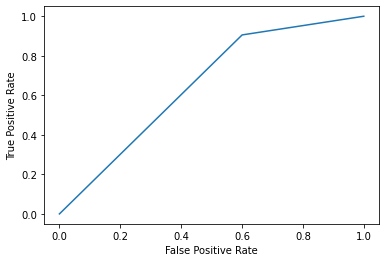

In [60]:
# Prediction
y_pred_xgb = gridsearchcv.predict(X_test_final) 
print('\nAccuracy: {:.4f},\nPrecision: {:.4f},\nRecall: {:.4f},\nF1 score: {:.4f}'.format(
    accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_xgb),
    f1_score(y_test, y_pred_xgb)))
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_xgb)
print('AUC: {:.4f}'.format(auc(fpr, tpr)))
print('ROC curve')
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [61]:
# Confusion matrix
confusion_matrix(y_test, y_pred_xgb)

array([[ 3934,  5909],
       [ 1911, 18316]], dtype=int64)

<AxesSubplot:>

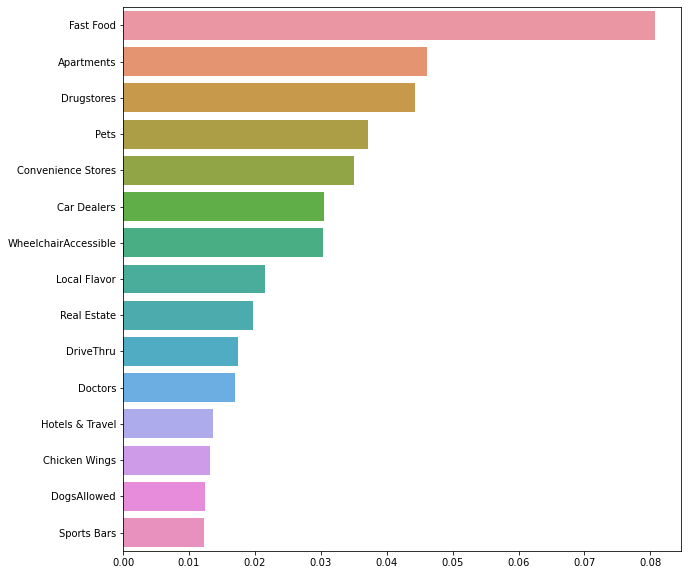

In [62]:
sorted_index = gridsearchcv.best_estimator_.feature_importances_.argsort()[::-1][:15]
plt.figure(figsize=(10,10))
sns.barplot(y=X_test_final.columns[sorted_index], x=gridsearchcv.best_estimator_.feature_importances_[sorted_index],
           orient='h')

## Problem 2

### Join data sets with business and review

In [63]:
# Drop date column
review_df_ndate = review_df.drop(['date'], axis=1)

In [64]:
# Drop stars on business
business_cat_df = business_df.join(categories_df, how='inner')
business_cat_df.drop(['categories', 'name', 'address', 'city', 'postal_code', 'latitude',
                      'longitude', 'hours', 'stars', 'attributes'], axis=1,
                     inplace=True)
# Select categories
categ_analysis_names = ['Shopping','business_id']
business_cat_df = business_cat_df[categ_analysis_names]
business_cat_df.shape

(150346, 2)

In [65]:
business_cat_df.head()

,Shopping,business_id
0,0,Pns2l4eNsfO8kk83dixA6A
1,0,mpf3x-BjTdTEA3yCZrAYPw
2,1,tUFrWirKiKi_TAnsVWINQQ
3,0,MTSW4McQd7CbVtyjqoe9mw
4,0,mWMc6_wTdE0EUBKIGXDVfA


In [66]:
# Check the columns
print(review_df_ndate.columns)
print(business_cat_df.columns)

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text'],
      dtype='object')
Index(['Shopping', 'business_id'], dtype='object')


In [67]:
# Join data sets
rev_bus_df = review_df_ndate.merge(business_cat_df, on = 'business_id', how = 'inner')

In [68]:
print(rev_bus_df.shape)

(6990280, 9)


### Text data

In [69]:
# Import nltk for text courpus preparation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import string
# Import regular expressions
import re
# Import gensim for LDA
import gensim
from gensim import corpora
# Coherence model
from gensim.models import CoherenceModel
from gensim.models import Phrases

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yuliya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yuliya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yuliya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Analysis of Shopping Reviews

In [70]:
# Preprocessing of text corpus

# Stop words
stop_words = set(stopwords.words('english'))
stop_words.update({'come', 'try', 'go', 'make', 'place',
                  'would', 'really', 'like','came', 'got',
                  'store','said', 'need', 'told', 'made', 'could',
                  'thing', 'also', 'even', 'one', 'new', 'item',
                  'time', 'customer', 'service', 'great', 'shop',
                  'went', 'called', 'always', 'get', 'back'})
# Punctuation
punctuations = re.compile("["+string.punctuation+"]")
# Lemmatization
lemmas = WordNetLemmatizer()
# Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Rewrite 
def text_clean(text):
    # Transform to lower case
    text_prep = text.lower()
    # Remove digits
    text_prep = re.sub(r'[0-9]', '', text_prep)
    # Tokenize
    text_prep = tokenizer.tokenize(text_prep)
    # Lemmatization
    text_prep = [lemmas.lemmatize(word) for word in text_prep]
    # Remove stop words
    text_prep = [word for word in text_prep if word not in stop_words]
    # Remove words which shorter than 2 characters
    text_clean = [word for word in text_prep if len(word) > 2]
    return text_clean

In [71]:
# Add bigrams
# def add_bigrams(text, bigram):
#     for word in bigram[text]: 
#         if '_' in word:
#             text.append(word)
#             return text
#         else:
#             return text

### Topic model (LDA)

In [72]:
# Create the term dictionary
def create_dictionary(column_with_tokens):
    dictionary = corpora.Dictionary(column_with_tokens)
    print('Length {}'.format(len(dictionary)))
    print(dictionary)
    return dictionary

In [73]:
# Create the Document-Term Matrix (documents into bag of words)
def create_doc_term_matrix(corpus_dictionary, column_with_tokens):
    doc_term_matrix = [corpus_dictionary.doc2bow(d) for d in column_with_tokens]
    return doc_term_matrix

In [74]:
# LDA model (check passes)
# doc_term_matrix: document term matrix
# n_cores: number of cores
# n_topics: number of topics
# corpus_dictionary: dictionary
def construct_lda_model(doc_term_matrix, n_cores, n_topics, corpus_dictionary):
    lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=doc_term_matrix,
                                                    workers=n_cores,
                                                    num_topics=n_topics,
                                                    id2word=corpus_dictionary,
                                                    passes=3,
                                                    random_state=0,
                                                    eval_every=1)
    return lda_model

In [75]:
# Find optimal number of topics
# Compute Coherence Score (Shows interpretability)
# lda_model: lda object
def coh_score(lda_model, doc_term_matrix):
    coherence_model_lda = CoherenceModel(model=lda_model, corpus=doc_term_matrix, coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)
    return coherence_lda

In [76]:
# Get top 10 words for each topic
def get_topic_top10_words(n_topics, lda_model, corpus_dictionary):
    top10_words = []
    for i in range(n_topics):
        top_words = lda_model.get_topic_terms(i,10)
        top10_words.append([corpus_dictionary[word[0]] for word in top_words])
    # Convert to Dataframe
    top10_words_df = pd.DataFrame(top10_words).transpose()
    # Column names
    topic_list = (np.array(range(n_topics)) + 1).tolist()
    topic_list = ['topic ' + str(i) for i in topic_list]
    top10_words_df.columns = topic_list
    return top10_words_df

##### Reviews

In [77]:
# Shopping reviews
rev_bus_shop_df = rev_bus_df.loc[rev_bus_df.Shopping == 1,['review_id', 'business_id', 'stars',
                                                           'useful', 'funny','cool', 'text']]

In [78]:
print(rev_bus_shop_df.shape)
rev_bus_shop_df.head(2)

(523254, 7)


,review_id,business_id,stars,useful,funny,cool,text
1877,rGQRf8UafX7OTlMNN19I8A,uMvVYRgGNXf5boolA9HXTw,5.0,2,0,0,My experience with Shalimar was nothing but wo...
1878,A0uKELjTgN7Z-MW1Z1iNfQ,uMvVYRgGNXf5boolA9HXTw,4.0,3,0,0,"Very helpful and patient. 20"" 14k gold chain ..."


In [79]:
# Transform text into token corpus
# Shopping
rev_bus_shop_df['text_transformed'] = rev_bus_shop_df['text'].apply(lambda x: text_clean(x))

In [80]:
# Shopping positive reviews
rev_bus_shop_pos_df = rev_bus_shop_df[rev_bus_shop_df.stars >= 4]

# Shopping negative reviews
rev_bus_shop_neg_df = rev_bus_shop_df[rev_bus_shop_df.stars <= 2]

In [81]:
rev_bus_shop_neg_df.head()

,review_id,business_id,stars,useful,funny,cool,text,text_transformed
1880,ApTBT96Jo8NgPDkRbmOdyA,uMvVYRgGNXf5boolA9HXTw,1.0,0,0,0,They have forever lost my business. Ordered a ...,"[forever, lost, business, ordered, ring, promi..."
1881,H7QI9u4ffsq_sTDxIudmpg,uMvVYRgGNXf5boolA9HXTw,1.0,0,0,0,please dont go here they have bullshit gold th...,"[please, dont, bullshit, gold, mixing, jeweler..."
1882,NaY-rXE9zbOi3PVY5_OCGA,uMvVYRgGNXf5boolA9HXTw,1.0,2,0,0,I walked in today to look at a few rings and ...,"[walked, today, look, ring, possibly, purchase..."
1883,R7vyrzcROHyNb0ULvkWtgA,uMvVYRgGNXf5boolA9HXTw,1.0,4,3,0,Bought a bracelet about 6 months ago that brok...,"[bought, bracelet, month, ago, broke, twice, t..."
1884,Dn8ZMVUWnrr7oIegVfbHrA,uMvVYRgGNXf5boolA9HXTw,1.0,0,0,0,My experience with this jeweler started out fi...,"[experience, jeweler, started, fine, wanted, a..."


In [82]:
rev_bus_shop_df['text_transformed'].isnull().sum()

0

In [83]:
# Create bigrams
# Add bigrams to documents that appear 20 times or more

# shop_bigram = Phrases(rev_bus_shop_df['text_transformed'].tolist(), min_count=20)

In [84]:
# rev_bus_shop_df['text_transformed'] = rev_bus_shop_df['text_transformed'].apply(lambda x: shop_bigram[x] if x is not None else x)

In [85]:
# Create dictionary for data sets
shop_dictionary = create_dictionary(rev_bus_shop_df['text_transformed'])
shop_pos_dictionary = create_dictionary(rev_bus_shop_pos_df['text_transformed'])
shop_neg_dictionary = create_dictionary(rev_bus_shop_neg_df['text_transformed'])

Length 135512
Dictionary(135512 unique tokens: ['able', 'accommodate', 'accommodating', 'afternoon', 'around']...)
Length 106426
Dictionary(106426 unique tokens: ['able', 'accommodate', 'accommodating', 'afternoon', 'around']...)
Length 69863
Dictionary(69863 unique tokens: ['anklet', 'asked', 'balance', 'bracelet', 'business']...)


In [86]:
# Create DTM for data sets:
shop_doc_term_matrix = create_doc_term_matrix(corpus_dictionary=shop_dictionary, 
                                              column_with_tokens=rev_bus_shop_df['text_transformed'])
shop_pos_doc_term_matrix = create_doc_term_matrix(corpus_dictionary=shop_pos_dictionary, 
                                              column_with_tokens=rev_bus_shop_pos_df['text_transformed'])
shop_neg_doc_term_matrix = create_doc_term_matrix(corpus_dictionary=shop_neg_dictionary, 
                                              column_with_tokens=rev_bus_shop_neg_df['text_transformed'])

In [87]:
# LDA model
# Shopping
shop_lda_model = construct_lda_model(doc_term_matrix=shop_doc_term_matrix,
                                     n_cores=n_cores,
                                     n_topics=15,
                                     corpus_dictionary=shop_dictionary)

In [88]:
# Shopping positive
shop_pos_lda_model = construct_lda_model(doc_term_matrix=shop_pos_doc_term_matrix,
                                     n_cores=n_cores,
                                     n_topics=10,
                                     corpus_dictionary=shop_pos_dictionary)

In [89]:
# Shopping negative
shop_neg_lda_model = construct_lda_model(doc_term_matrix=shop_neg_doc_term_matrix,
                                     n_cores=n_cores,
                                     n_topics=7,
                                     corpus_dictionary=shop_neg_dictionary)

In [90]:
# Coherence score
coh_score(lda_model=shop_lda_model, doc_term_matrix=shop_doc_term_matrix)
coh_score(lda_model=shop_pos_lda_model, doc_term_matrix=shop_pos_doc_term_matrix)
coh_score(lda_model=shop_neg_lda_model, doc_term_matrix=shop_neg_doc_term_matrix)


Coherence Score:  -2.3074049134550396

Coherence Score:  -2.2146654365144847

Coherence Score:  -1.8018923014384218


-1.8018923014384218

In [91]:
# Top 10 words in topic
shop_topic_top10_words = get_topic_top10_words(n_topics=15, lda_model=shop_lda_model, corpus_dictionary=shop_dictionary)
shop_pos_topic_top10_words = get_topic_top10_words(n_topics=10, lda_model=shop_pos_lda_model, corpus_dictionary=shop_pos_dictionary)
shop_neg_topic_top10_words = get_topic_top10_words(n_topics=7, lda_model=shop_neg_lda_model, corpus_dictionary=shop_neg_dictionary)

In [92]:
shop_topic_top10_words

,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11,topic 12,topic 13,topic 14,topic 15
0,dress,hair,line,shirt,food,price,glass,food,call,flower,mattress,work,cake,book,product
1,bike,cut,location,look,good,good,eye,good,day,plant,mask,recommend,chocolate,find,phone
2,experience,asked,people,fabric,coffee,selection,appointment,wine,never,day,employee,job,orleans,love,screen
3,ring,salon,employee,size,love,find,frame,beer,order,beautiful,furniture,professional,candy,gift,apple
4,helpful,rude,minute,little,market,staff,doctor,sandwich,phone,arrangement,bed,highly,beignet,selection,best
5,wedding,never,parking,know,fresh,mall,year,bar,week,wedding,home,experience,good,art,tire
6,shoe,experience,wait,girl,tea,nice,staff,cigar,company,florist,room,friendly,sweet,little,help
7,looking,walked,cashier,dog,lot,lot,prescription,drink,manager,garden,year,amazing,well,see,repair
8,price,look,long,room,little,sale,contact,restaurant,delivery,tree,way,guy,cafe,fun,helpful
9,staff,color,open,first,best,well,exam,ordered,business,order,know,thank,nola,staff,guy


In [93]:
shop_pos_topic_top10_words

,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10
0,staff,dress,lot,hair,find,food,art,book,bike,day
1,friendly,recommend,food,salon,price,good,ring,selection,price,experience
2,love,flower,good,cut,love,coffee,piece,love,guy,work
3,helpful,experience,parking,job,selection,delicious,jewelry,good,good,recommend
4,price,wedding,mall,best,good,love,museum,game,day,price
5,product,amazing,area,love,sale,sandwich,work,staff,work,needed
6,good,day,find,amazing,shoe,fresh,beautiful,nice,phone,professional
7,selection,highly,people,move,well,cheese,see,cigar,repair,order
8,nice,staff,around,stylist,looking,best,tour,friendly,know,delivery
9,well,eye,nice,nice,nice,amazing,love,music,year,home


In [94]:
shop_neg_topic_top10_words

,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7
0,employee,dress,order,day,phone,call,price
1,people,know,day,never,never,business,food
2,line,room,week,call,minute,day,good
3,asked,never,never,week,call,company,know
4,around,people,furniture,work,day,sale,never
5,staff,location,asked,dress,hour,phone,going
6,experience,good,two,flower,appointment,never,people
7,help,look,delivery,order,asked,delivery,find
8,cashier,asked,call,give,hair,manager,better
9,rude,way,another,first,prescription,money,much
